In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [206]:
df = pd.read_csv('salary_data.csv')

In [208]:
print(" Column Names:")
print(df.columns.tolist())

print("\n Data Types:")
print(df.dtypes)

 Column Names:
['empID', 'YearsExperience', 'Age', 'BTech?', 'MTech?', 'PhD?', 'Name', 'address', 'phone', 'branch', 'Salary']

 Data Types:
empID                int64
YearsExperience    float64
Age                float64
BTech?               int64
MTech?               int64
PhD?                 int64
Name                object
address             object
phone                int64
branch              object
Salary             float64
dtype: object


In [210]:
print(df.isnull().sum())


empID                 0
YearsExperience       0
Age                 379
BTech?                0
MTech?                0
PhD?                  0
Name                  0
address               0
phone                 0
branch                0
Salary             1920
dtype: int64


In [212]:
# Fill missing values in 'Age' with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in 'Salary' with mean
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())


In [214]:
print(df.isnull().sum())

empID              0
YearsExperience    0
Age                0
BTech?             0
MTech?             0
PhD?               0
Name               0
address            0
phone              0
branch             0
Salary             0
dtype: int64


In [216]:
df = df.drop(['Name', 'address', 'phone','empID','branch'], axis=1)
print(df.isnull().sum())

YearsExperience    0
Age                0
BTech?             0
MTech?             0
PhD?               0
Salary             0
dtype: int64


In [218]:


# Features and target
X = df[['YearsExperience', 'Age', 'BTech?', 'MTech?', 'PhD?']]
y = df['Salary']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0
)



In [220]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test set results
y_pred = model.predict(X_test)

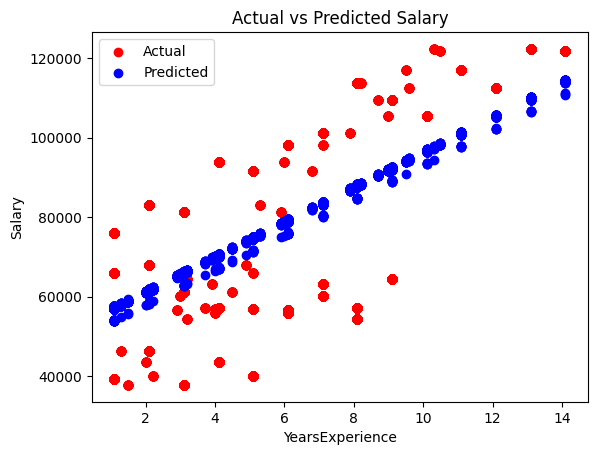

In [222]:
plt.scatter(X_test['YearsExperience'], y_test, color='red', label='Actual')
plt.scatter(X_test['YearsExperience'], y_pred, color='blue', label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

In [224]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.3717
Mean Squared Error: 384851010.5064
